In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from imblearn.pipeline import Pipeline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')
print(df.shape)

(284807, 31)


In [3]:
print(df[0:5])

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# No Nulls

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


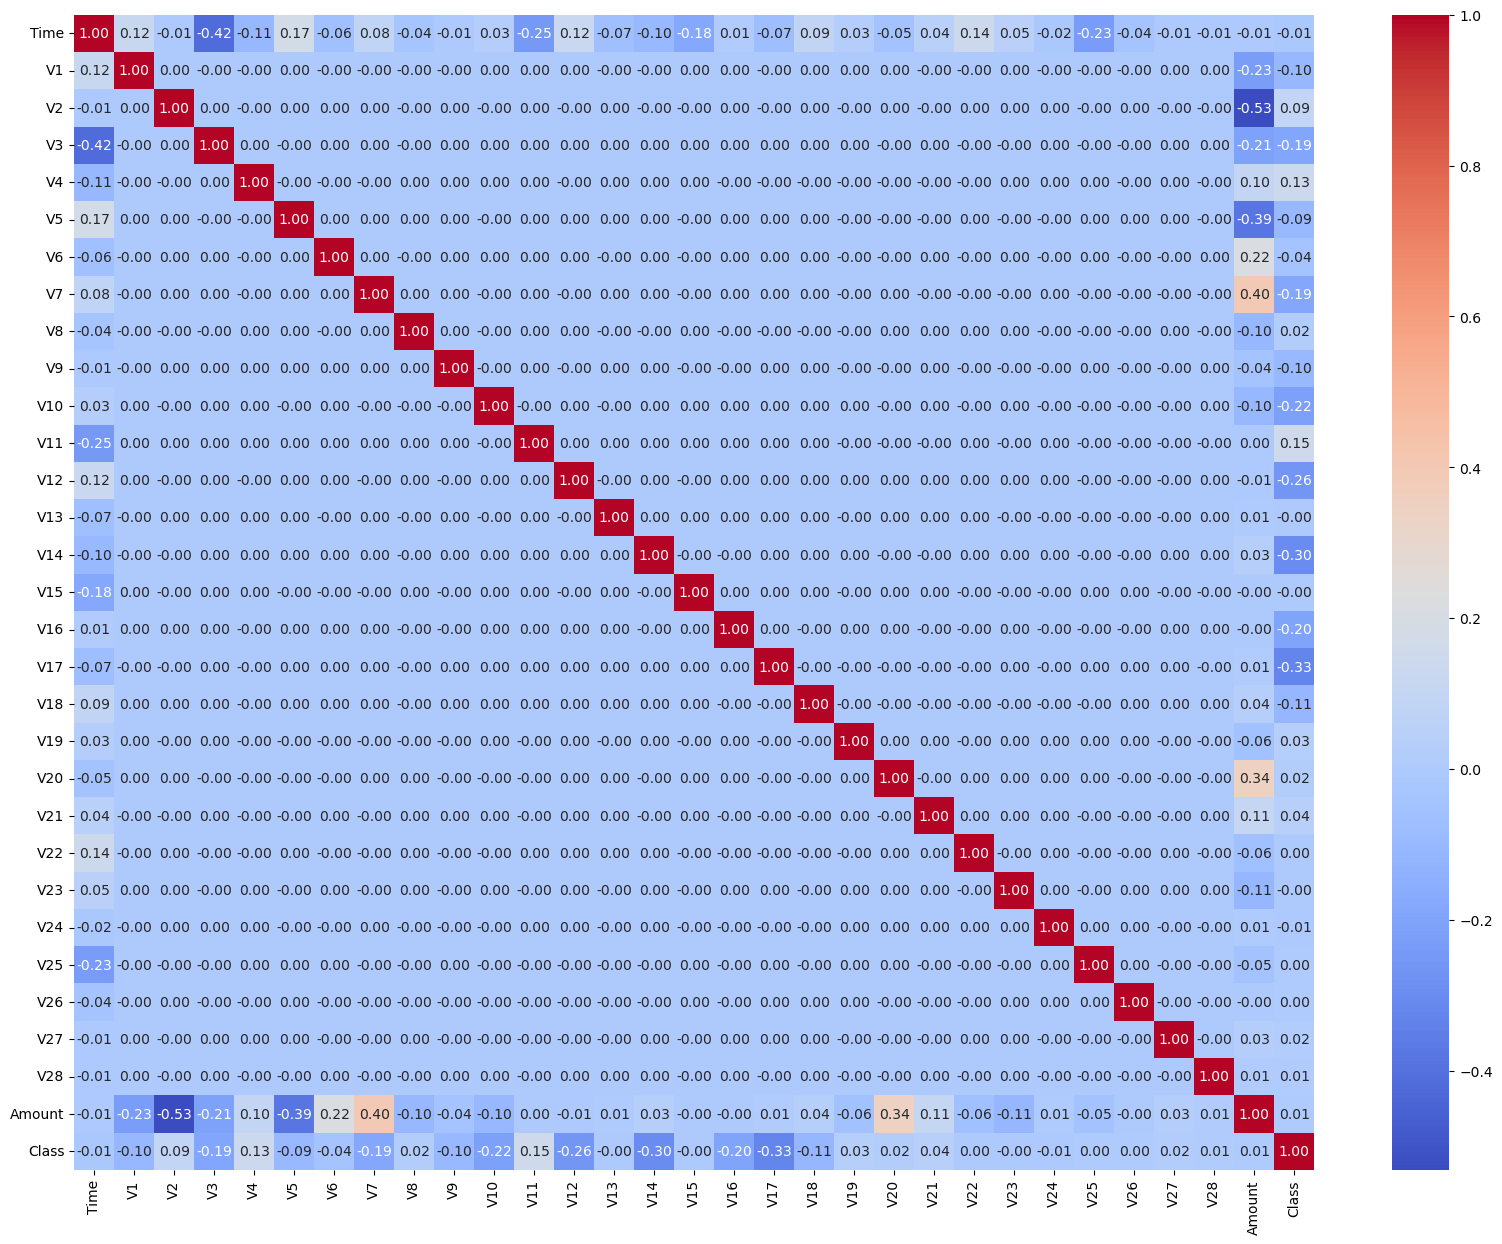

In [7]:
plt.figure(figsize=(20, 15))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
variances = df.var()
print(variances)

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64


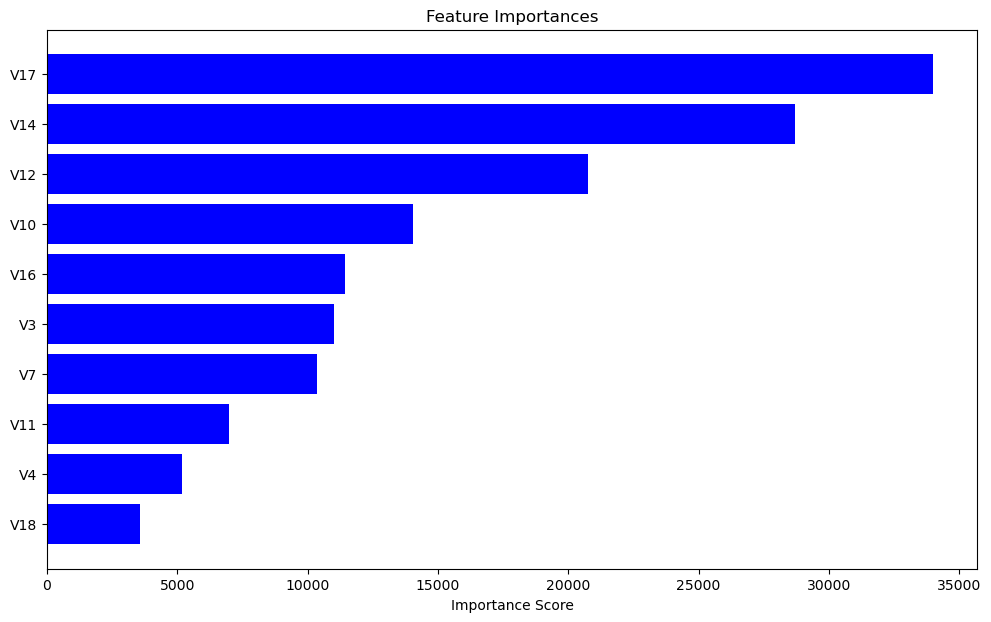

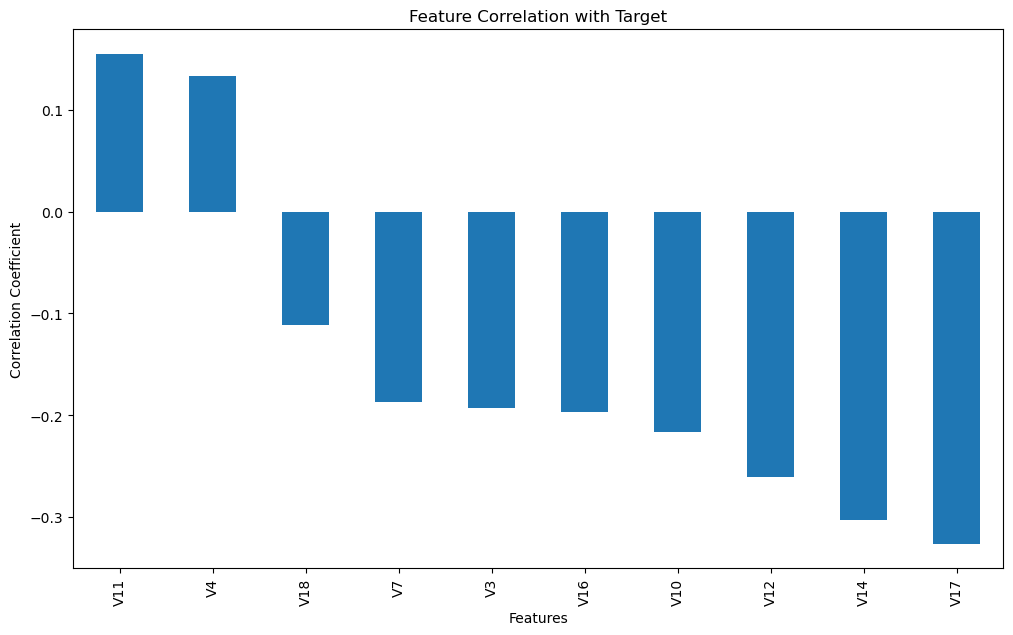

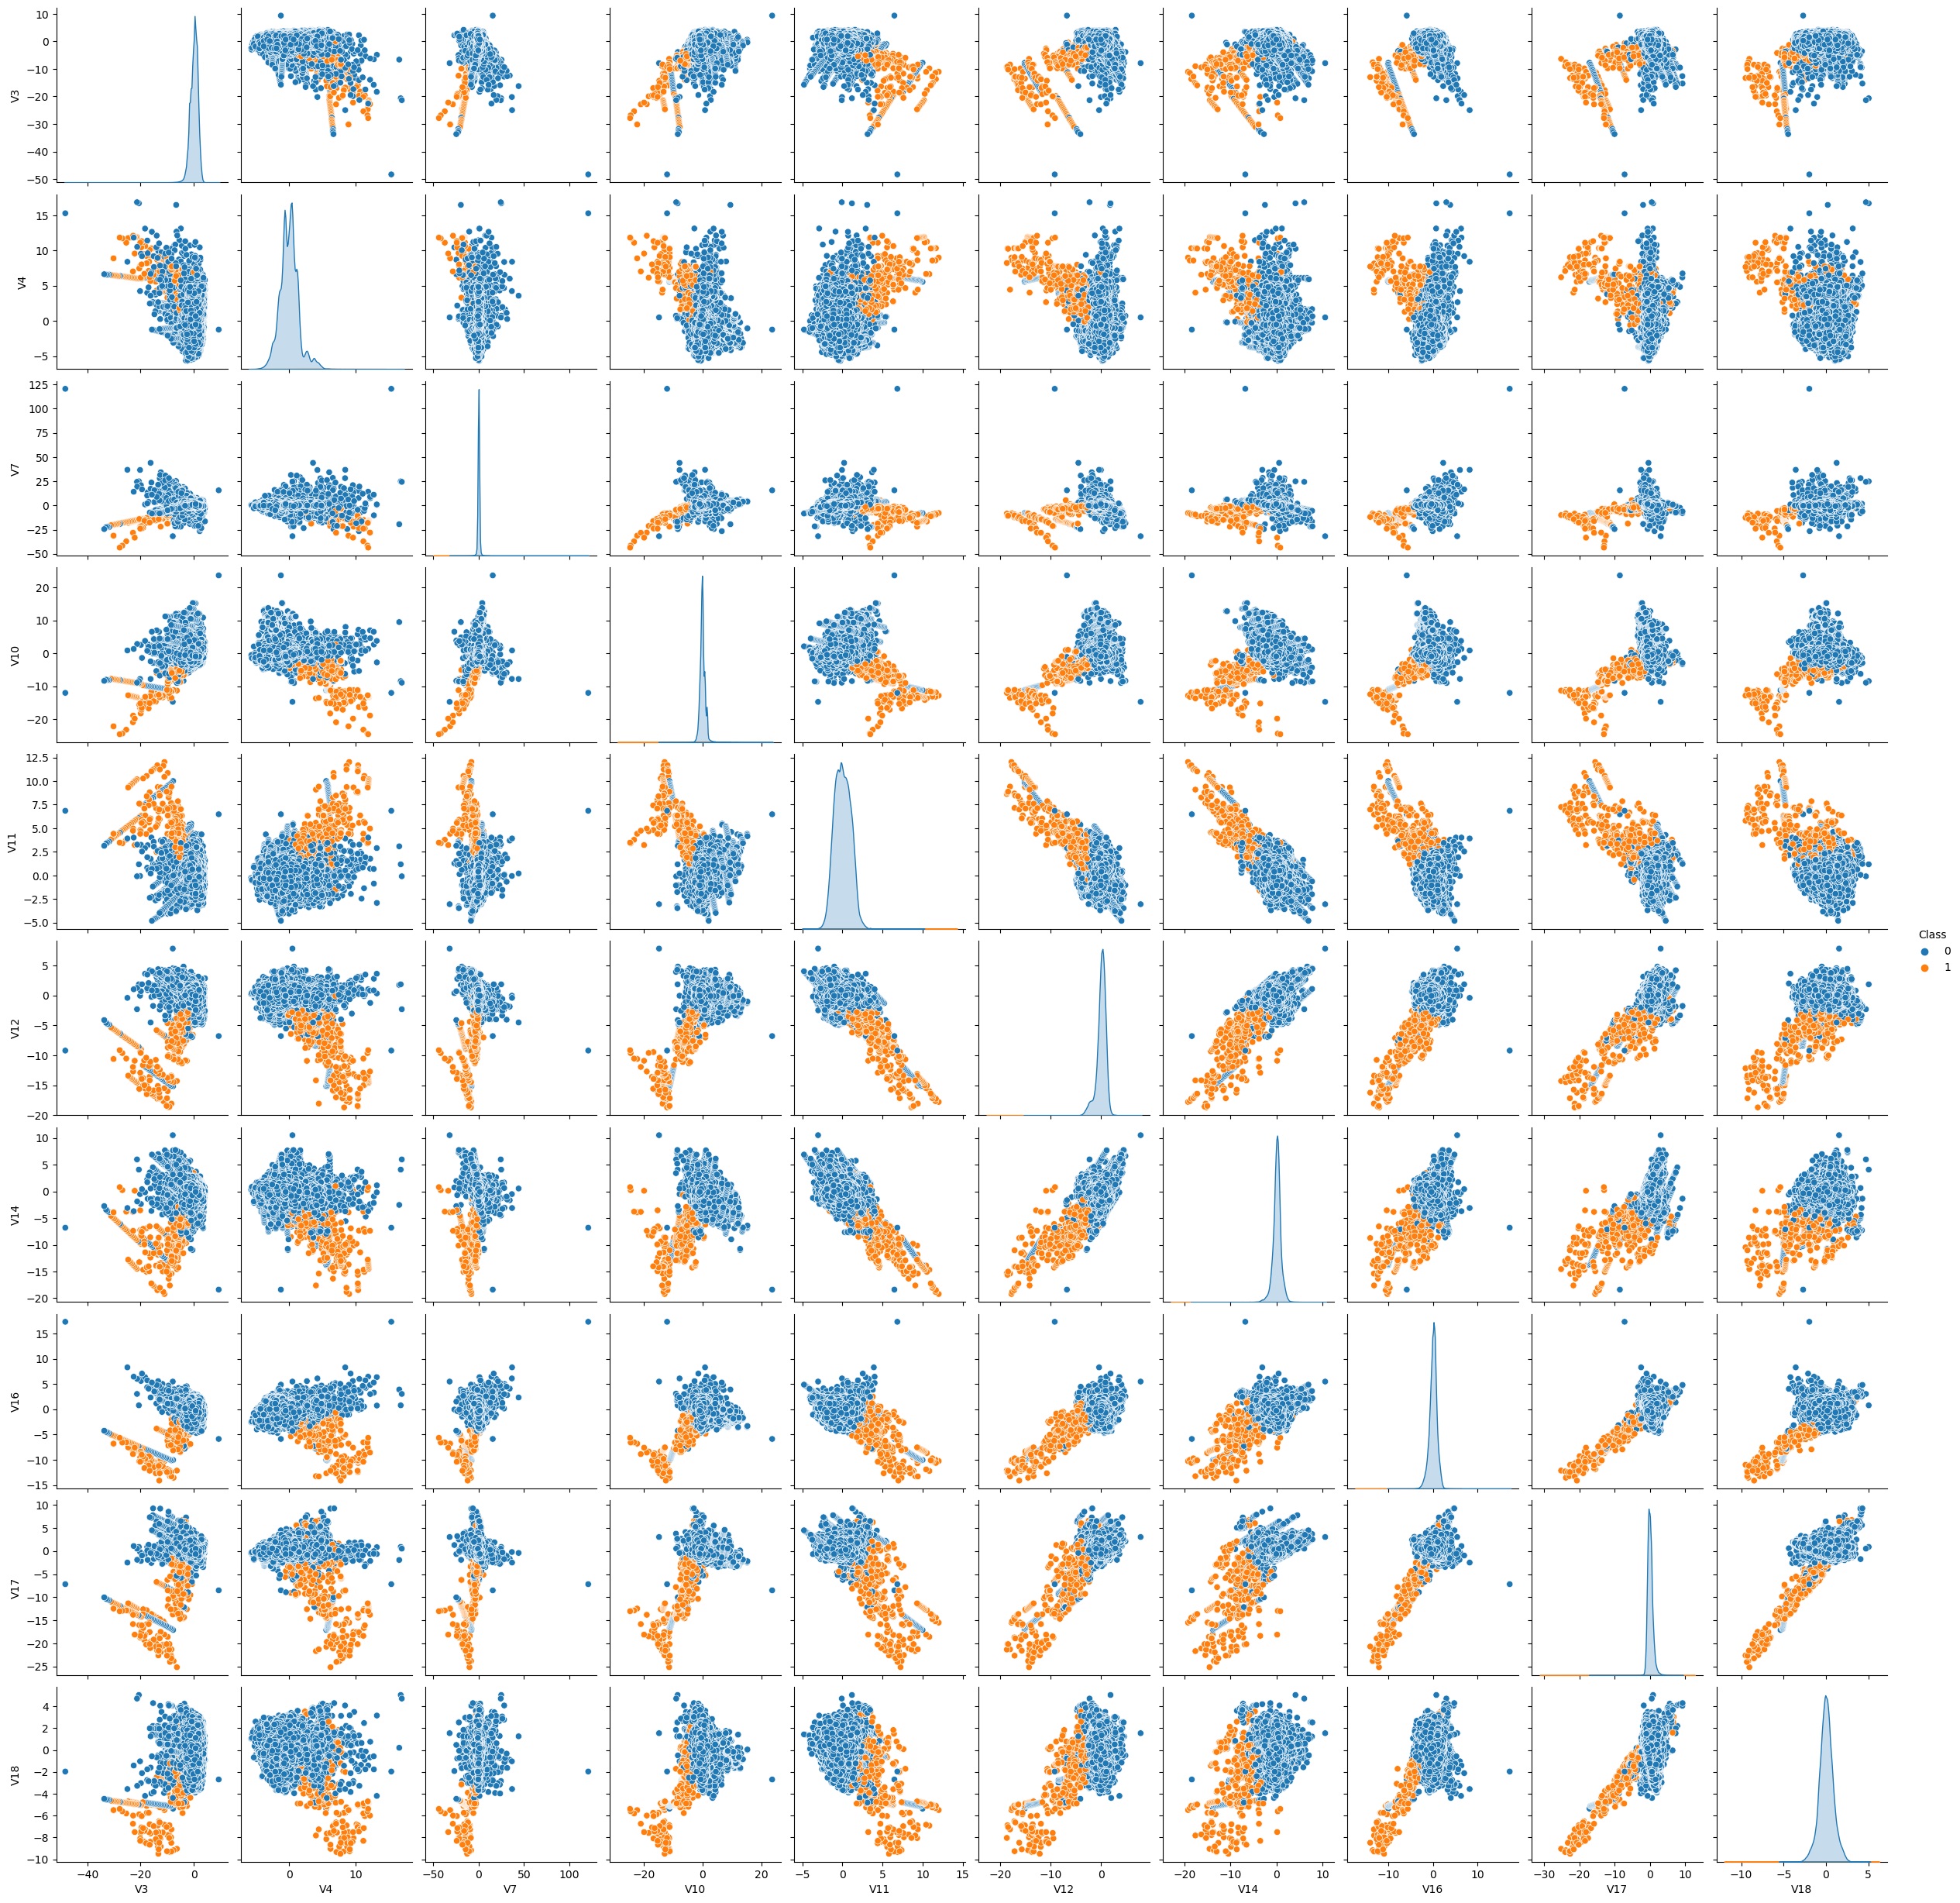

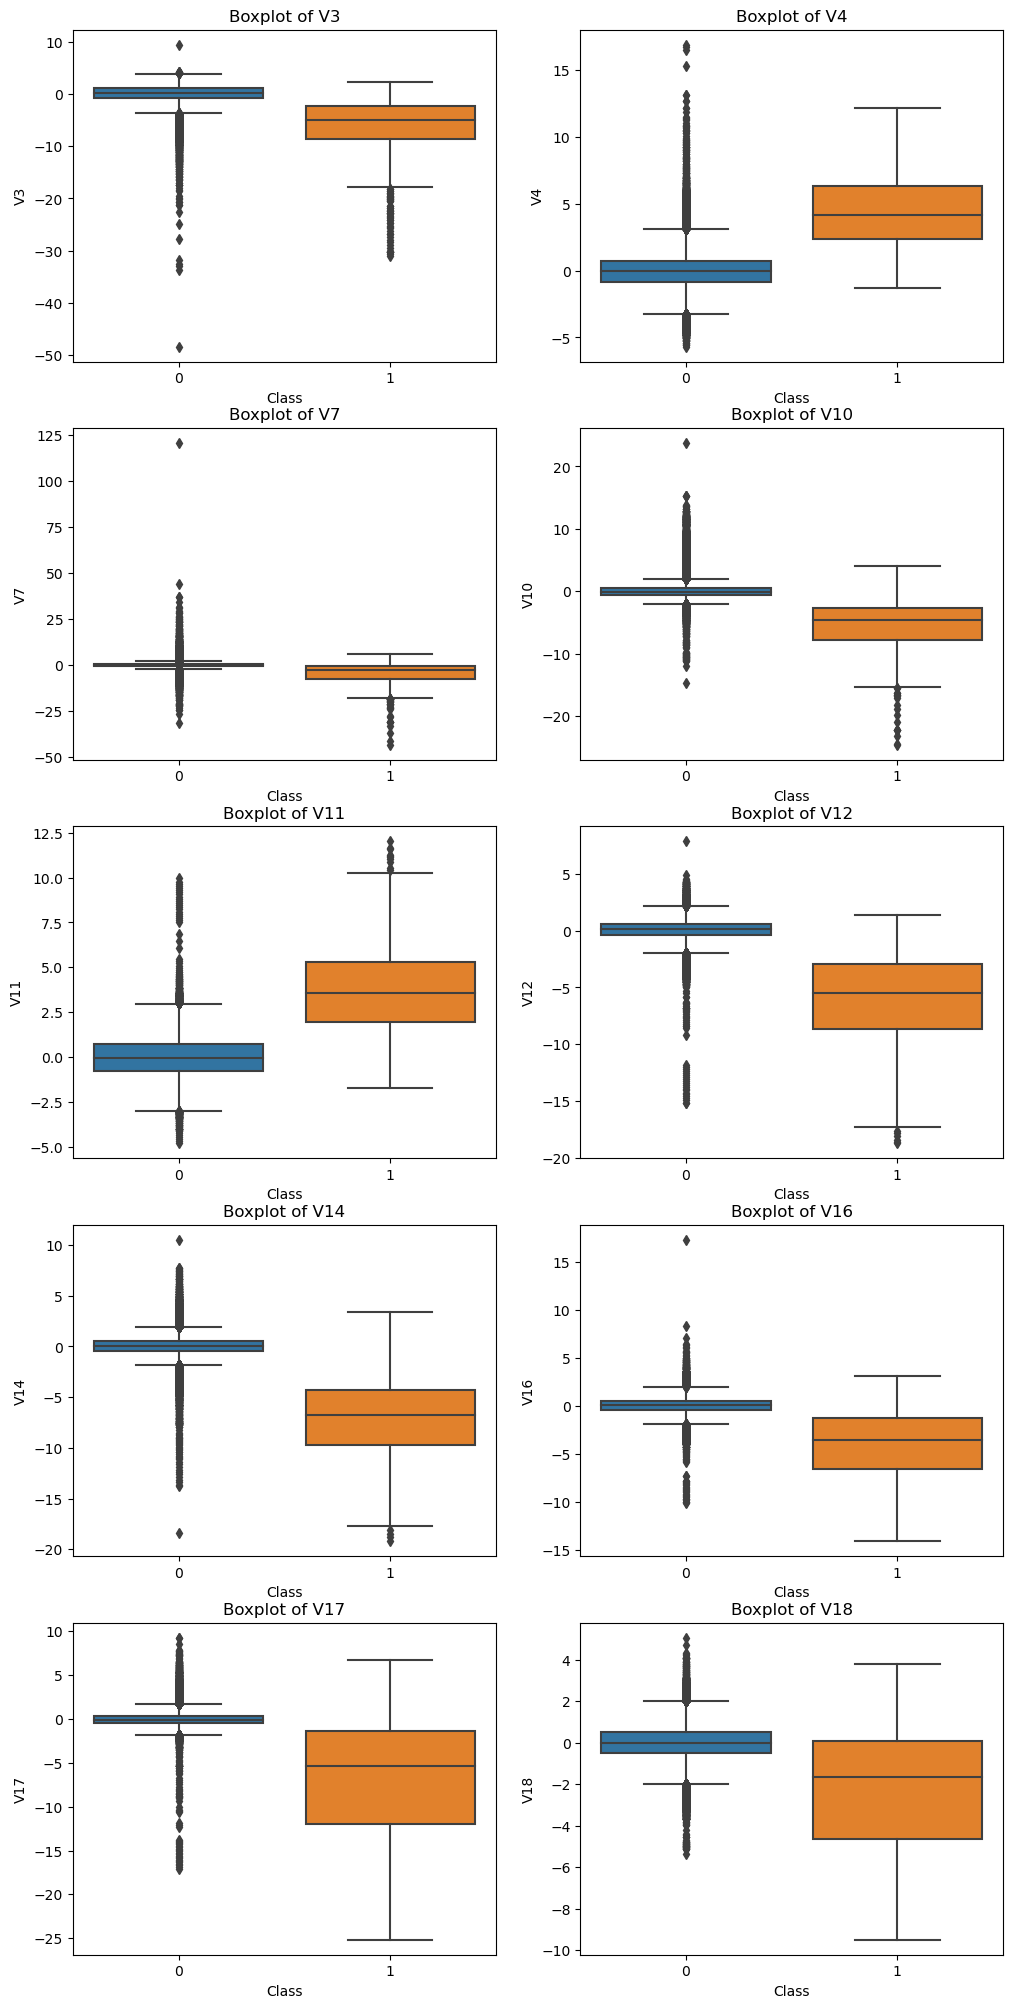

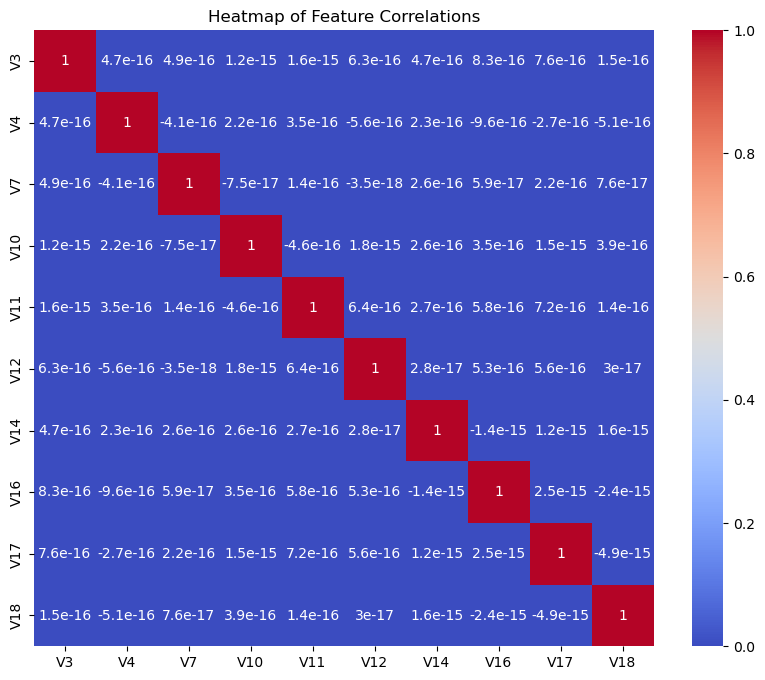

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it includes 'Class' as the target column
X = df.drop('Class', axis=1)
y = df['Class']

# Perform feature selection
selector = SelectKBest(f_classif, k=10)  # Adjusted to select top 10 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Calculate and plot feature importances
importances = selector.scores_[selector.get_support()]
indices = np.argsort(importances)

# Feature Importance Plot
plt.figure(figsize=(12, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
plt.xlabel('Importance Score')
plt.title('Feature Importances')

# Correlation with Target Variable
correlations = df[selected_features].corrwith(df['Class']).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
correlations.plot(kind='bar')
plt.title('Feature Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Pairwise Relationships Visualization
sns.pairplot(df[selected_features.tolist() + ['Class']], hue='Class', diag_kind='kde')

# Boxplots for Feature Distribution Across Classes
num_features = len(selected_features)
cols = 2  # Define number of columns in subplot
rows = num_features // cols + (num_features % cols > 0)  # Calculate required number of rows

plt.figure(figsize=(12, rows * 5))
for i, feature in enumerate(selected_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title('Boxplot of ' + feature)

# Heatmap of Feature Interactions
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')

plt.show()


from the previous observation we had seen that the data is highly imbalanced, inorder to overcome with it 
1) Undersampling technique                                                                                                       
2) Using SMOTE

In [17]:
df_0 = df[df['Class'] == 0].sample(n=984, random_state=42)
df_1 = df[df['Class'] == 1].sample(n=492, random_state=42)

df_under= pd.concat([df_0,df_1],ignore_index=True)

In [18]:
df_under.shape

(1476, 31)

In [19]:
X = df_under.drop('Class', axis=1)
y = df_under['Class']

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the balance in the training set after SMOTE
from collections import Counter
print("Training set class distribution:", Counter(y_train_res))


Training set class distribution: Counter({1: 673, 0: 673})


In [25]:
print("Shape of X_train_res:", X_train_res.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_res: (1346, 30)
Shape of X_test: (443, 30)
Shape of y_train_res: (1346,)
Shape of y_test: (443,)


In [29]:
from sklearn.linear_model import LogisticRegression

bal_lr=LogisticRegression(max_iter=1000)
bal_lr.fit(X_train_res,y_train_res)
bal_pred_train=bal_lr.predict(X_train_res)
bal_pred_test=bal_lr.predict(X_test)

In [31]:
bal_cl_report_train=classification_report(y_train_res,bal_pred_train)
print(bal_cl_report_train)
bal_cl_report_test=classification_report(y_test,bal_pred_test)
print(bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       673
           1       0.98      0.95      0.97       673

    accuracy                           0.97      1346
   macro avg       0.97      0.97      0.97      1346
weighted avg       0.97      0.97      0.97      1346

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       311
           1       0.90      0.92      0.91       132

    accuracy                           0.94       443
   macro avg       0.93      0.94      0.93       443
weighted avg       0.94      0.94      0.94       443



In [35]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_train' is your true labels and 'bal_pred_train' is your predictions
conf_matrix = confusion_matrix(y_train_res, bal_pred_train)

In [36]:
conf_matrix

array([[660,  13],
       [ 32, 641]], dtype=int64)

In [61]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, f1_score, classification_report


# Initialize Decision Tree Classifier using Gini index
dt_gini_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit classifiers to the training data
dt_gini_classifier.fit(X_train_res, y_train_res)
dt_entropy_classifier.fit(X_train_res, y_train_res)

# Predict on the test set using Gini index
dt_gini_pred_test = dt_gini_classifier.predict(X_test)
dt_gini_auc_test = roc_auc_score(y_test, dt_gini_classifier.predict_proba(X_test)[:, 1])

# Predict on the test set using Entropy
dt_entropy_pred_test = dt_entropy_classifier.predict(X_test)
dt_entropy_auc_test = roc_auc_score(y_test, dt_entropy_classifier.predict_proba(X_test)[:, 1])

# Calculate accuracy
dt_gini_acc_test = accuracy_score(y_test, dt_gini_pred_test)
dt_entropy_acc_test = accuracy_score(y_test, dt_entropy_pred_test)

# Calculate recall and F1-score
dt_gini_recall_test = recall_score(y_test, dt_gini_pred_test)
dt_gini_f1_test = f1_score(y_test, dt_gini_pred_test)
dt_entropy_recall_test = recall_score(y_test, dt_entropy_pred_test)
dt_entropy_f1_test = f1_score(y_test, dt_entropy_pred_test)

# Print results for Gini index
print("Gini Criterion Results:")
print(f"Accuracy: {dt_gini_acc_test:.6f}")
print(f"AUC: {dt_gini_auc_test:.6f}")
print(f"Recall: {dt_gini_recall_test:.6f}")
print(f"F1 Score: {dt_gini_f1_test:.6f}")

# Print results for Entropy
print("\nEntropy Criterion Results:")
print(f"Accuracy: {dt_entropy_acc_test:.6f}")
print(f"AUC: {dt_entropy_auc_test:.6f}")
print(f"Recall: {dt_entropy_recall_test:.6f}")
print(f"F1 Score: {dt_entropy_f1_test:.6f}")


Gini Criterion Results:
Accuracy: 0.902935
AUC: 0.904706
Recall: 0.909091
F1 Score: 0.848057

Entropy Criterion Results:
Accuracy: 0.927765
AUC: 0.922391
Recall: 0.909091
F1 Score: 0.882353


In [62]:
#rf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# List of different numbers of estimators
estimators_list = [20, 50, 100, 200, 300]

# Loop through each number of estimators
for n_estimators in estimators_list:
    # Initialize the Random Forest Classifier with different number of estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train_res, y_train_res)

    # Predict on the test set
    rf_pred_test = rf_classifier.predict(X_test)

    # Calculate accuracy on the test set
    rf_acc_test = accuracy_score(y_test, rf_pred_test)

    # Calculate AUC on the test set using predict_proba
    rf_auc_test = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

    # Calculate recall and F1-score
    recall_test = recall_score(y_test, rf_pred_test)
    f1_test = f1_score(y_test, rf_pred_test)

    # Print the accuracy, AUC, recall, and F1-score in a concise format
    print(f"Random Forest with {n_estimators} Trees: Accuracy = {rf_acc_test:.4f}, AUC = {rf_auc_test:.4f}")
    print(f"Recall = {recall_test:.4f}, F1 Score = {f1_test:.4f}\n")

Random Forest with 20 Trees: Accuracy = 0.9549, AUC = 0.9741
Recall = 0.9015, F1 Score = 0.9225

Random Forest with 50 Trees: Accuracy = 0.9549, AUC = 0.9777
Recall = 0.8864, F1 Score = 0.9213

Random Forest with 100 Trees: Accuracy = 0.9549, AUC = 0.9728
Recall = 0.8864, F1 Score = 0.9213

Random Forest with 200 Trees: Accuracy = 0.9549, AUC = 0.9735
Recall = 0.8864, F1 Score = 0.9213

Random Forest with 300 Trees: Accuracy = 0.9549, AUC = 0.9732
Recall = 0.8864, F1 Score = 0.9213



In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, X, y, name):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    acc_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    auc_scores = cross_val_score(model, X, y, scoring=make_scorer(roc_auc_score, needs_proba=True), cv=cv, n_jobs=-1)
    recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    f1_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

    # Print results in a formatted string
    print(f"{name} Acc: {acc_scores.mean():.2f} (+/- {acc_scores.std():.2f})")
    print(f"{name} AUC: {auc_scores.mean():.2f} (+/- {auc_scores.std():.2f})")
    print(f"{name} Recall: {recall_scores.mean():.2f} (+/- {recall_scores.std():.2f})")
    print(f"{name} F1 Score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")

# Initialize classifiers
gb_classifier = GradientBoostingClassifier(random_state=42)
ab_classifier = AdaBoostClassifier(random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', random_state=42)

# Evaluate models
evaluate_model(gb_classifier, X_train_res, y_train_res, "Gradient Boosting")
evaluate_model(ab_classifier, X_train_res, y_train_res, "AdaBoost")
evaluate_model(mlp_classifier, X_train_res, y_train_res, "MLP")

Gradient Boosting Acc: 0.96 (+/- 0.02)
Gradient Boosting AUC: 0.99 (+/- 0.01)
Gradient Boosting Recall: 0.95 (+/- 0.03)
Gradient Boosting F1 Score: 0.96 (+/- 0.02)
AdaBoost Acc: 0.96 (+/- 0.02)
AdaBoost AUC: 0.99 (+/- 0.01)
AdaBoost Recall: 0.95 (+/- 0.03)
AdaBoost F1 Score: 0.96 (+/- 0.02)
MLP Acc: 0.65 (+/- 0.13)
MLP AUC: 0.77 (+/- 0.12)
MLP Recall: 0.67 (+/- 0.31)
MLP F1 Score: 0.63 (+/- 0.16)


In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a function to evaluate the model and print results
def evaluate_model_with_cv(model, X, y, name):
    # Configure the cross-validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    # Create a pipeline to ensure scaling is included in the cross-validation steps
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Evaluate the model using multiple metrics
    acc_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    auc_scores = cross_val_score(pipeline, X, y, scoring=make_scorer(roc_auc_score, needs_proba=True), cv=cv, n_jobs=-1)
    recall_scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
    f1_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
    
    # Print the formatted results
    print(f"{name} Acc: {acc_scores.mean():.2f} (+/- {acc_scores.std():.2f})")
    print(f"{name} AUC: {auc_scores.mean():.2f} (+/- {auc_scores.std():.2f})")
    print(f"{name} Recall: {recall_scores.mean():.2f} (+/- {recall_scores.std():.2f})")
    print(f"{name} F1 Score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")


# Initialize the SVM with the default radial basis function (rbf) kernel
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Evaluate the SVM model
evaluate_model_with_cv(svm_classifier, X_train_res, y_train_res, "SVM")

SVM Acc: 0.95 (+/- 0.02)
SVM AUC: 0.99 (+/- 0.01)
SVM Recall: 0.93 (+/- 0.04)
SVM F1 Score: 0.95 (+/- 0.03)
